In [6]:
# Imports
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Arrow, Circle
import numpy as np
import pandas as pd

class ValueSd:
    def __init__(self, data):
        data = data.split('~')
        self.value = float(data[0])
        self.sd = float(data[1])

class Channel:
    def __init__(self, data):
        data = [s for s in data.split(',')]
        self.lifetime = ValueSd(data[0])
        self.num = ValueSd(data[1])

class ChannelPair:
    def __init__(self, data):
        data = [s for s in data.split(':')]
        self.detected = Channel(data[0])
        self.simulated = Channel(data[1])

class Key:
    def __init__(self, data):
        data = [s for s in data.split(',')]
        self.digitizer_id = int(data[0])
        self.frame_number = int(data[0])

class Timings:
    def __init__(self, data):
        data = [s for s in data.split(',')]
        self.time = ValueSd(data[0])
        self.time_per_byte_in = ValueSd(data[1])
        self.time_per_byte_out = ValueSd(data[2])

class DataLine:
    def __init__(self, data):
        self.header = Key(data[0])
        data = data[1].split(';')
        self.timing = Timings(data[0])
        self.channels = [ChannelPair(line) for line in data[1:]]

def read_file(path):
    f = open(path, 'r')
    data = [DataLine(line.split('|')) for line in f.read().splitlines()]
    return data

In [7]:
def plot_test(index, num_tests, tte_num, tte_life, sim_num, sim_life, num_frames, x_axis_legend, a, b):
    x_axis = [a*f + b for f in range(num_frames)]

    plt.subplot(num_tests, 2, index*2 + 1)
    plt.xlabel (x_axis_legend)
    plt.ylabel (f'Number of Events Recorded (Test {index + 1})')
    plt.errorbar(x_axis, [v.value for v in tte_num], yerr = [v.sd for v in tte_num], color = 'red', ecolor = 'pink', label = "Formation")
    plt.errorbar(x_axis, [v.value for v in sim_num], yerr = [v.sd for v in sim_num], color = 'green', ecolor = 'palegreen', label = "Simulation")
    plt.legend(loc = "upper left")

    plt.subplot(num_tests, 2, index*2 + 2)
    plt.xlabel (x_axis_legend)
    plt.ylabel (f'Estimated Muon Lifetime (Test {index + 1})')
    plt.errorbar(x_axis, [v.value for v in tte_life], yerr = [v.sd for v in tte_life], color = 'red', ecolor = 'pink', label = "Formation")
    plt.errorbar(x_axis, [v.value for v in sim_life], yerr = [v.sd for v in sim_life], color = 'green', ecolor = 'palegreen', label = "Simulation")
    plt.legend(loc = "upper left")

def do_channel_pair_plot(index, num_tests, data, channel_id, x_axis_legend, a, b):
    (det_num, det_life) = get_channel_plot_data([d.channels[channel_id].detected for d in data])
    (sim_num, sim_life) = get_channel_plot_data([d.channels[channel_id].simulated for d in data])
    plot_test(index, num_tests, det_num, det_life, sim_num, sim_life, len(data), x_axis_legend, a, b)

def get_channel_plot_data(data):
    num = [d.num for d in data]
    life = [d.lifetime for d in data]
    return (num,life)


<ErrorbarContainer object of 3 artists>

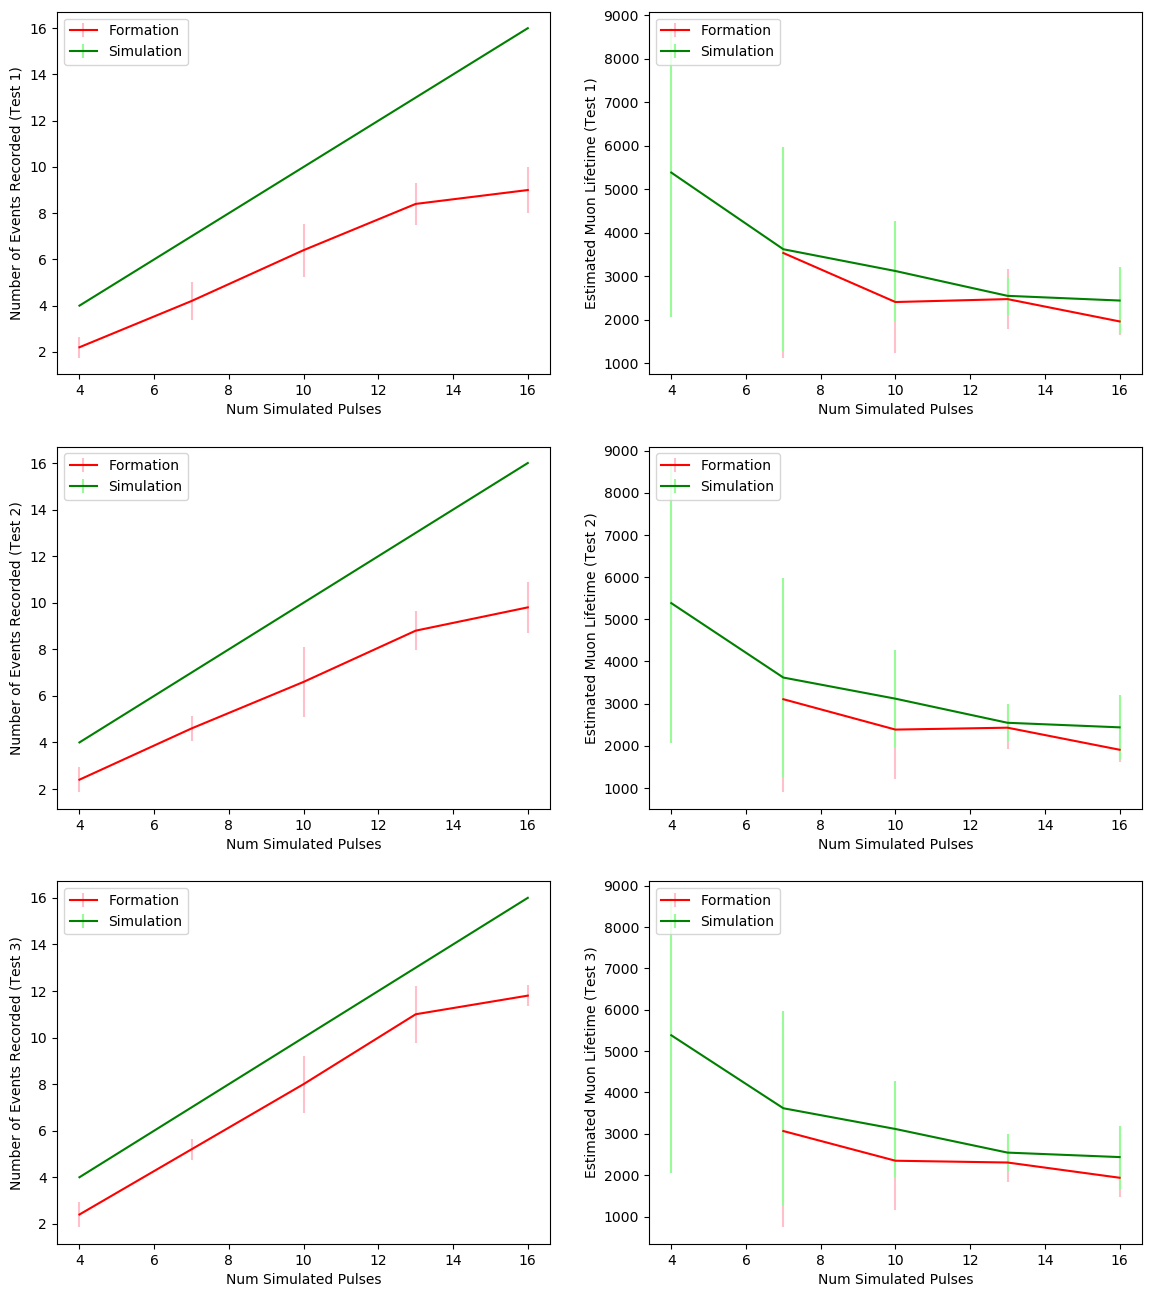

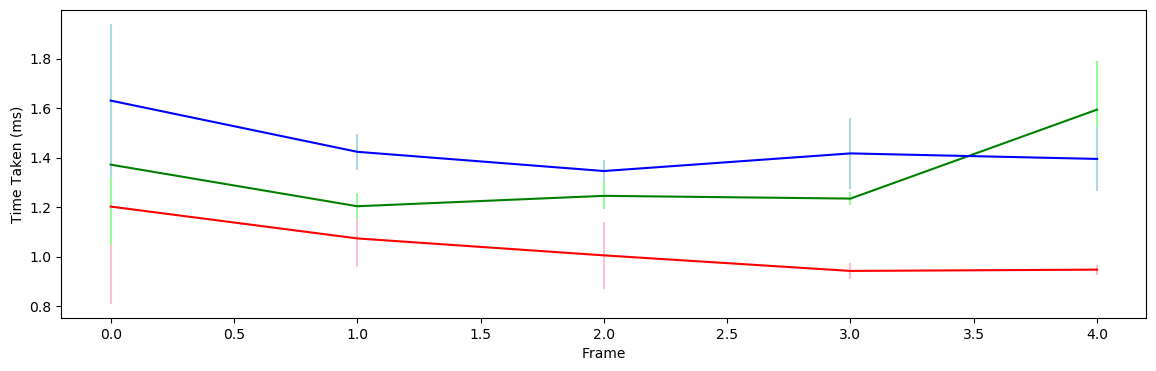

In [21]:
NUM_TESTS = 3
EXPR = 1

filepath = lambda test: f"../../output/Saves/Tests/Data/data.{EXPR}.{test}.csv"
channel_id = 0
plt.figure(figsize = (14,16))
data = read_file(filepath(1))
do_channel_pair_plot(0, NUM_TESTS, data, channel_id, "Num Simulated Pulses", 3,4)
time1 = [d.timing.time for d in data]

data = read_file(filepath(2))
do_channel_pair_plot(1, NUM_TESTS, data, channel_id, "Num Simulated Pulses", 3,4)
time2 = [d.timing.time for d in data]

data = read_file(filepath(3))
do_channel_pair_plot(2, NUM_TESTS, data, channel_id, "Num Simulated Pulses", 3,4)
time3 = [d.timing.time for d in data]

plt.figure(figsize = (14,4))
plt.xlabel ('Frame')
plt.ylabel ('Time Taken (ms)')
plt.errorbar(range(len(time1)), [t.value/1_000_000.0 for t in time1], [t.sd/1_000_000.0 for t in time1], color = "red", ecolor = "pink", label = "Test 1")
plt.errorbar(range(len(time2)), [t.value/1_000_000.0 for t in time2], [t.sd/1_000_000.0 for t in time2], color = "green", ecolor = "palegreen", label = "Test 2")
plt.errorbar(range(len(time3)), [t.value/1_000_000.0 for t in time3], [t.sd/1_000_000.0 for t in time3], color = "blue", ecolor = "lightblue", label = "Test 3")

